# I. Gradient Descent Multivariat

In [2]:
#Tugas: Imporlah pustaka-pustaka (libraries) yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 

import time


C:\Users\ACER\AppData\Local\Temp\ipykernel_1632\511015287.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
table = np.genfromtxt('data_multivariat.txt', delimiter=',')
X = table[:, 0:2]
#Tugas: Ambillah kolom terakhir sebagai y
y = table[:, -1]


X = table[:, 0:2]
#Tugas: Ambillah kolom terakhir sebagai y
y = table[:, -1]

## A. Fungsi Perhitungan Gradient Descent

Buat suatu fungsi berisi algoritma Gradient Descent untuk menghitung parameter model linear dengan $n$ fitur dan $m$ instance data berikut:

$$
h_\mathbf{\theta}(\mathbf{x}) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \dots + \theta_2x_2.
$$

Input fungsi adalah sebagai berikut:
* Matriks $X$ berukuran $m\times n$. Elemen baris ke $i$ dan kolom ke $j$ dari matriks, yaitu $x^{(i)}_j$, adalah instance ke $i$ dari data latih pada fitur ke $j$, untuk setiap $i=1,2,\dots, m$ dan $j=1,2,\dots,n$.
* Vektor $y$ berukuran $m$. Elemen ke $i$ dari vektor $y$, yaitu $y^{(i)}$ adalah nilai variabel output untuk instance data ke $i$, untuk setiap $i=1,2,\dots, m$.
* ```NumIterations```, yaitu banyaknya perulangan yang dilakukan pada algoritma Gradient Descent.
* ```alpha```, yaitu besarnya *learning rate*.

Output fungsi adalah sebuah matriks $\Theta$ berukuran ```NumIterations```$\times (n+1)$. Elemen pada baris ke $k$ dan kolom ke $j$ dari matriks tersebut, yaitu $\theta_{kj}$, adalah parameter ke $j$ dari model linear yang diperoleh pada iterasi ke $k$ dari algoritma Gradient Descent; untuk semua $j=0,1,\dots,n$ dan $k=1,2,\dots,$```NumIterations```.

In [9]:
# Manual Grad Descent
start_time = time.time()

numIterations = 10000
alpha = 1e-7

def hip(theta, x):
    return theta.T @ x

def GradDesc(X, y, numIterations, alpha):
    m, n = np.shape(X)
    theta = np.reshape(np.zeros(n+1), (-1, 1))
    X = np.append(np.reshape(np.ones(m), (-1, 1)), X, axis = 1)
    
    for i in range(numIterations):
        grad = np.zeros(n+1)
        for j in range(n+1):
            summ = 0
            for k in range(m):
                summ += X[k, j] * (hip(theta[:, -1], X[k, :].T) - y[k]) 
            grad[j] = summ 
        theta = np.append(theta, np.reshape(theta[:, -1] - (grad * alpha / m), (-1,1)), axis = 1)
    
    Theta = theta.T
    
    return Theta

Theta = GradDesc(X, y, numIterations, alpha)

end_time = time.time()
print(end_time-start_time)

print(Theta)

6.937537670135498
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.40412660e-02 7.64209128e+01 1.12036770e-01]
 [5.27931073e-02 1.17528875e+02 1.73069931e-01]
 ...
 [9.60026936e+00 1.65354770e+02 1.68224004e+01]
 [9.60122212e+00 1.65354767e+02 1.68240581e+01]
 [9.60217488e+00 1.65354765e+02 1.68257159e+01]]


## B. Versi Tervektorisasi
Buatlah algoritma Gradient Descent dalam bentuk yang tervektorisasi (semua operasi didefinisikan dalam operasi vektor dan matriks).

Pada setiap iterasinya, ketika mengkomputasi nilai gradien sebagai berikut:

$$
\dfrac{\partial J(\mathbf{\Theta})}{\partial \theta_j}= \dfrac{1}{m}\sum\limits_{i=1}^m(h_{\mathbf{\theta}}(\mathbf{x}^{(i)})-y^{(i)})x_j^{(i)}, \qquad \text{ untuk semua }j=0,1,\dots m,
$$

keseluruhan perhitungan sebetulnya dapat diekspresikan sebagai beberapa operasi matriks. Misalkan kita definisikan beberapa notasi berikut.

$$
\mathbf{\Theta}=\begin{bmatrix}
\theta_0\\ 
\theta_1\\ 
\vdots \\
\theta_n
\end{bmatrix}, \qquad
\nabla J = \begin{bmatrix}
\dfrac{\partial J(\mathbf{\Theta})}{\partial \theta_0}\\
\dfrac{\partial J(\mathbf{\Theta})}{\partial \theta_1}\\
\vdots \\
\dfrac{\partial J(\mathbf{\Theta})}{\partial \theta_n}
\end{bmatrix}.
$$

Maka, (cek!)

$$
\nabla J = X^T(X\mathbf{\Theta}-\mathbf{y})/m
$$

Sehingga perhitungan update nilai $\theta$ dapat dilakukan dalam bentuk vektor sebagai berikut:

$$
\mathbf{\Theta} := \mathbf{\Theta} - \alpha \nabla J.
$$

Perhitungan dengan bentuk vektor semacam ini memiliki keuntungan sebagai berikut:
* Penulisan kode menjadi sangat ringkas. (perhitungan di atas dapat ditulis hanya dengan 1 baris kode saja)
* Perhitungan dengan Numpy telah teroptimisasi untuk perhitungan operasi matriks. Artinya, running time algoritma yang ditulis dalam bentuk tervektorisasi (semuanya murni dalam operasi matriks/vektor) akan secara signifikan jauh lebih cepat dibanding perhitungan yang dilakukan dengan menggunakan desain for-loop manual.

In [10]:
# Vectorised Grad Descent
start_time = time.time()

numIterations = 10000
alpha = 1e-7

def GradDescVect(X, y, numIterations, alpha):
    m, n = np.shape(X)
    theta = np.zeros(n+1)
    X = np.append(np.reshape(np.ones(m), (-1, 1)), X, axis = 1)
    Theta = np.reshape(theta, (1, -1))
    
    for i in range(numIterations):
        theta = theta - (X.T @ (X @ theta - y)) * (alpha / m)
        Theta = np.append(Theta, np.reshape(theta, (1, -1)), axis=0)
    return Theta

Theta_vect = GradDescVect(X, y, numIterations, alpha)
end_time = time.time()
print(end_time-start_time)
print(Theta_vect)


0.30052781105041504
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.40412660e-02 7.64209128e+01 1.12036770e-01]
 [5.27931073e-02 1.17528875e+02 1.73069931e-01]
 ...
 [9.60026936e+00 1.65354770e+02 1.68224004e+01]
 [9.60122212e+00 1.65354767e+02 1.68240581e+01]
 [9.60217488e+00 1.65354765e+02 1.68257159e+01]]


Bandingkan waktu performa kedua algoritma tersebut. Buatlah kesimpulan.

### Kesimpulan:

Versi tervektorisasi lebih cepat

## C. Fungsi Plot 3D

Buatlah fungsi untuk membuat plot 3 dimensi untuk regresi linear dengan dua fitur (plot tidak bisa dibuat untuk data latih dengan lebih dari 2 fitur).

Input:
* Matriks $X$ berukuran $m\times 2$. Elemen baris ke $i$ dan kolom ke $j$ dari matriks, yaitu $x^{(i)}_j$, adalah instance ke $i$ dari data latih pada fitur ke $j$, untuk setiap $i=1,2,\dots, m$ dan $j=1,2,\dots,n$.
* Vektor $\mathbf{y}$ berukuran $m$. Elemen ke $i$ dari vektor $y$, yaitu $y^{(i)}$ adalah nilai variabel output untuk instance data ke $i$, untuk setiap $i=1,2,\dots, m$.
* vektor $\mathbf{\Theta}$ berukuran 3.

Output:
Sebuah grafik 3D yang berisi:
* Scatter plot titik-titik data latih $X$ dan $\mathbf{y}$.
* Bidang linear hasil model regresi dengan $\mathbf{\Theta}$ sebagai parameter-parameternya.

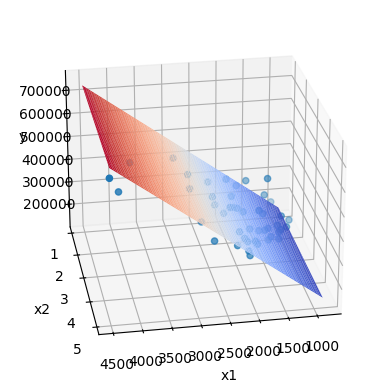

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot_solution(X, y, theta):
    def f(x1, x2, theta):
        return theta[0] + x1 * theta[1] + x2 * theta[2]

    x_lin = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 1000)
    y_lin = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 1000)

    Xgrid, Ygrid = np.meshgrid(x_lin, y_lin)
    Z = f(Xgrid, Ygrid, theta)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], y)
    ax.plot_surface(Xgrid, Ygrid, Z, cmap=cm.coolwarm)#, linewidth=0, antialiased=False)
    ax.view_init(25, 80)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    plt.show()

plot_solution(X, y, Theta[-1, :])

## D. Feature Scaling

Implementasikan kembali algoritma Gradient Descent dengan menerapkan teknik preprocessing Feature Scaling.

Setiap instance dari masing-masing fitur akan ditransformasi (diubah nilainya) dengan tujuan agar range nilai data dari masing-masing fitur terseragamkan.

$$
\hat{x}_j^{(i)}:= \dfrac{x_j^{(i)}-\mu_{\mathbf{x}_j}}{\sigma_{\mathbf{x}_j}}, \quad \text{ untuk }j=0, 1, \dots, n.
$$
di mana $\mu_{\mathbf{x}_j}$ dan $\sigma_{\mathbf{x}_j}$ secara berturut-turut adalah rata-rata dan standar deviasi dari semua instace data pada nilai fitur ke $j$ nya.

Teknik di atas disebut sebagai **Normalisasi**. Akan terdapat teknik feature scaling lainnya yang tidak dibahas dalam bagian ini.

**Catatan:** Data yang perlu diskalakan hanya variabel input saja. Nilai variabel output tidak perlu diskalakan.

[[ 1.31415422e-01 -2.26093368e-01]
 [-5.09640698e-01 -2.26093368e-01]
 [ 5.07908699e-01 -2.26093368e-01]
 [-7.43677059e-01 -1.55439190e+00]
 [ 1.27107075e+00  1.10220517e+00]
 [-1.99450507e-02  1.10220517e+00]
 [-5.93588523e-01 -2.26093368e-01]
 [-7.29685755e-01 -2.26093368e-01]
 [-7.89466782e-01 -2.26093368e-01]
 [-6.44465993e-01 -2.26093368e-01]
 [-7.71822042e-02  1.10220517e+00]
 [-8.65999486e-04 -2.26093368e-01]
 [-1.40779041e-01 -2.26093368e-01]
 [ 3.15099326e+00  2.43050370e+00]
 [-9.31923697e-01 -2.26093368e-01]
 [ 3.80715024e-01  1.10220517e+00]
 [-8.65782986e-01 -1.55439190e+00]
 [-9.72625673e-01 -2.26093368e-01]
 [ 7.73743478e-01  1.10220517e+00]
 [ 1.31050078e+00  1.10220517e+00]
 [-2.97227261e-01 -2.26093368e-01]
 [-1.43322915e-01 -1.55439190e+00]
 [-5.04552951e-01 -2.26093368e-01]
 [-4.91995958e-02  1.10220517e+00]
 [ 2.40309445e+00 -2.26093368e-01]
 [-1.14560907e+00 -2.26093368e-01]
 [-6.90255715e-01 -2.26093368e-01]
 [ 6.68172729e-01 -2.26093368e-01]
 [ 2.53521350e-01 -2

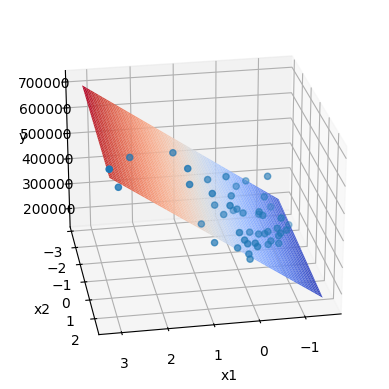

In [12]:
def feature_scaling(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    return (X - mu) / sigma

X_scaled = feature_scaling(X)
print(X_scaled)
Theta_scaled = GradDescVect(X_scaled, y, 10000, 1e-2)
print(Theta_scaled)
plot_solution(X_scaled, y, Theta_scaled[-1, :])

## E. Evaluasi model dengan Fungsi Biaya

Ingat kembali fungsi biaya
$$
J(\theta_0, \dots, \theta_n) = \dfrac{1}{2m}\sum_{i=1}^m(h_{\mathbf{\theta}}(x_0^{(i)}, x_1^{(i)}, \dots, x_n^{(i)})-y^{(i)})^2.
$$

Kita akan menggunakan fungsi biaya tersebut untuk membandingkan model yang dihasilkan dengan dan tanpa teknik feature scaling. Untuk membandingkannya, buatlah grafik nilai fungsi biaya terhadap iterasi untuk kedua algoritma gradient descent. Agar perbedaan terlihat dengan jelas, **jangan masukkan nilai fungsi biaya untuk 100 iterasi pertama**, karena nilainya terlalu besar.

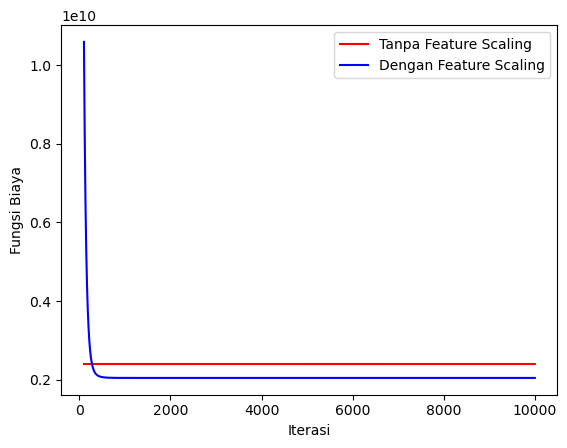

In [7]:
def cost_function(X, y, theta):
    m, n = np.shape(X)
    X = np.append(np.reshape(np.ones(m), (-1, 1)), X, axis = 1)
    return np.sum((X @ theta - y) ** 2) / (2 * m)

cost_without = [cost_function(X, y, Theta[i, :]) for i in range(len(Theta))]
cost_with = [cost_function(X_scaled, y, Theta_scaled[i, :]) for i in range(len(Theta_scaled))]
x_plot = range(len(Theta))

plt.plot(x_plot[100:], cost_without[100:], 'r', label = 'Tanpa Feature Scaling')
plt.plot(x_plot[100:], cost_with[100:], 'b', label = 'Dengan Feature Scaling')
plt.legend()
plt.xlabel("Iterasi")
plt.ylabel("Fungsi Biaya")
plt.show()

# II. Regresi Linear dengan data Real

Dalam tugas ini, Anda akan mengolah data klaim asuransi serta membangun model Regresi Linear untuk memprediksi besarnya klaim asuransi yang perlu disiapkan oleh perusahaan asuransi ketika menerima nasabah baru.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [15]:
#Tugas: Bacalah data insurance.csv dan simpanlah pada variabel "data"
data = pd.read_csv('insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## A. Visualisasi Data berdimensi Tinggi

Sebelum menjalankan Regresi Linear, pada umumnya kita perlu memahami natur datanya untuk memastikan bahwa Regresi Linear memang adalah teknik yang tepat untuk jenis data tersebut. Hal ini biasanya dilakukan dengan menggambar grafik datanya. Namun demikian, hal ini menjadi kesulitan ketika data yang perlu digambar memiliki dimensi yang terlalu besar. Untuk mengatasi hal ini, library Seaborn memiliki fitur yang dapat membantu.

Perhatikan contoh berikut.

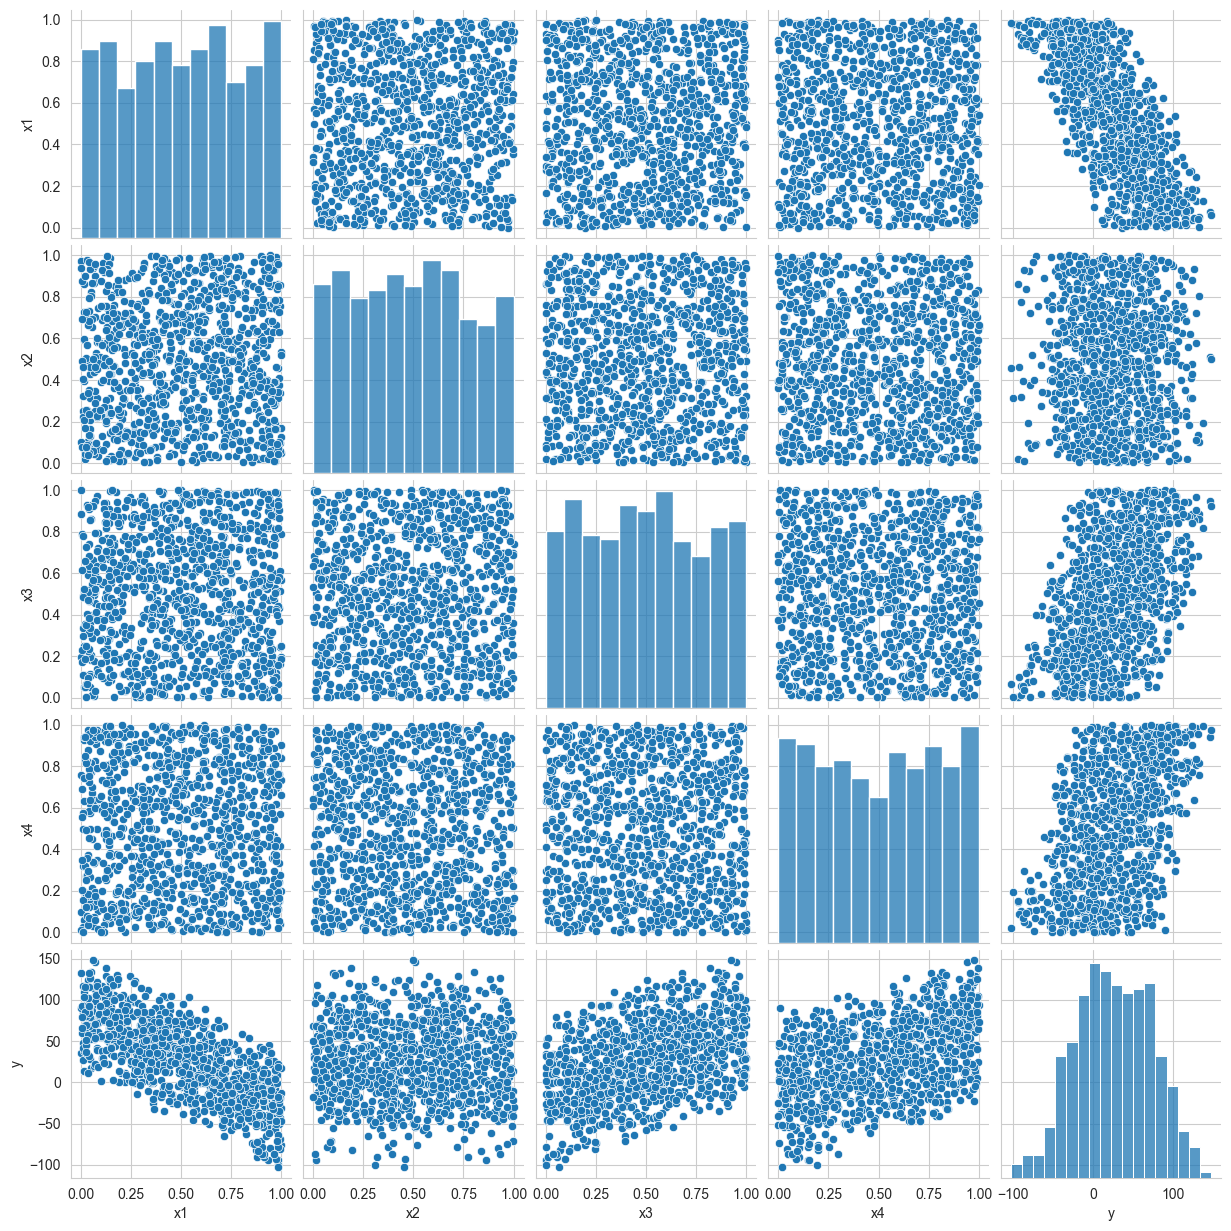

In [18]:
# Kode berikut membangkitkan data acak multidimensi
n = 1000
Xr = np.random.rand(4, n)
y = 10 - 120 * Xr[0, :] + 80 * Xr[2, :] + 75 * Xr[3, :] + 4 * np.random.normal(0, 1, n)
d = {
    "x1": pd.Series(Xr[0, :], index=range(n)),
    "x2": pd.Series(Xr[1, :], index=range(n)),
    "x3": pd.Series(Xr[2, :], index=range(n)),
    "x4": pd.Series(Xr[3, :], index=range(n)),
    "y": pd.Series(y, index=range(n)),
}
df_dumm = pd.DataFrame(d)
df_dumm

# Kode berikut memanggil fitur Seaborn untuk membandingkan hubungan antara fitur
sns.set_style("whitegrid")
sns.pairplot(df_dumm[["x1", "x2", "x3", "x4", "y"]])

**Penjelasan:**
* Terdapat 25 grafik, yang masing-masing merupakan grafik scatter plot untuk setiap dua fitur berbeda dan sebuah histogram untuk dua fitur yang sama (elemen diagonalnya)
* Perhatikan bahwa setiap pasangan nilai $x$ pada grafik di atas terlihat menyebar rata dan seperti tidak ada pola tertentu.
* Namun grafik antara suatu nilai $x$ tertentu dengan $y$ menunjukkan suatu hubungan seperti garis lurus. Artinya masuk akal untuk membuat suatu regresi linear dengan variabel $x$ sebagai inputnya dan $y$ sebagai outputnya.

### Tugas:
Buatlah visualisasi data seperti di atas untuk data klaim asuransi. Ingat bahwa data yang dapat digambar grafiknya hanya data yang bersifat numerik.

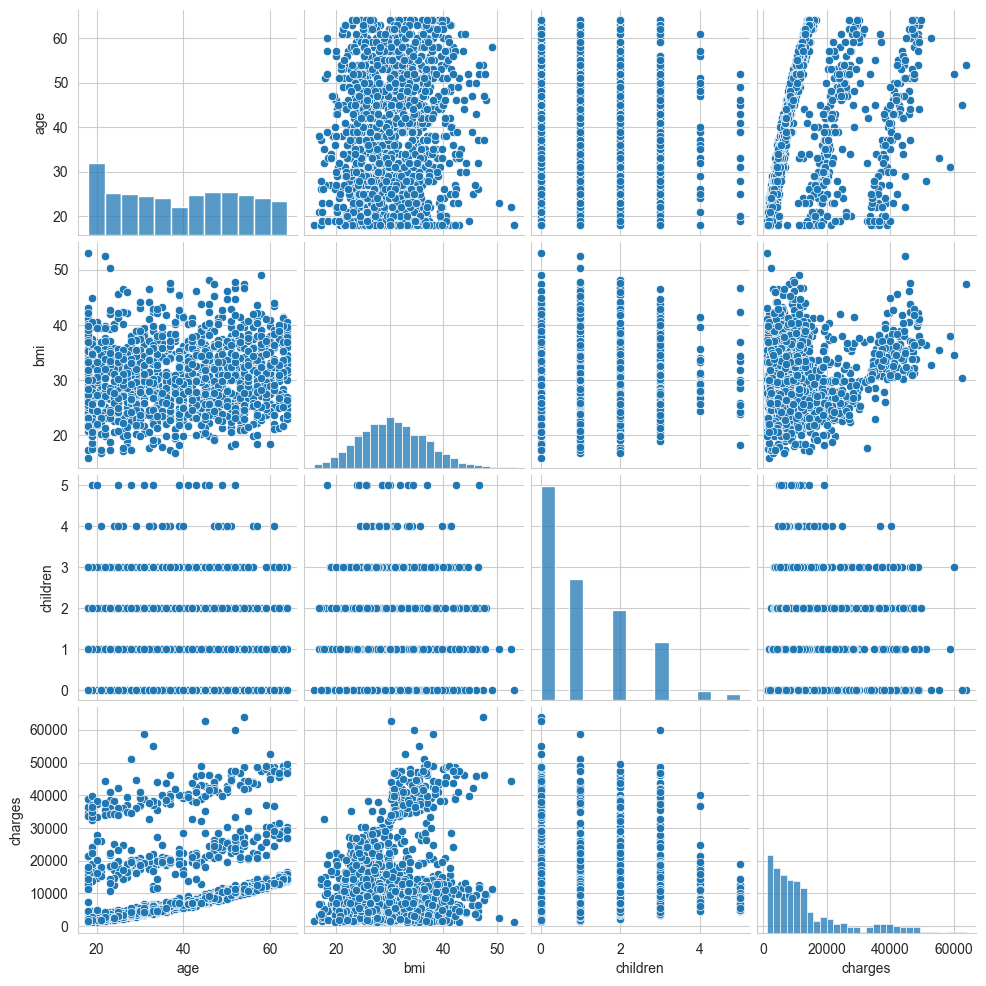

In [19]:
sns.set_style("whitegrid")
sns.pairplot(data[["age", "bmi", "children", "charges"]])

## B. One Hot Encoding untuk Data Kategorial

Dalam data di dunia nyata, seringkali terdapat data yang bersifat kategorial dan bersifat tidak kuantitatif. Data semacam ini tidak bisa diproses oleh tugas Regresi Linear. Namun demikian, seringkali data seperti ini justru memiliki pengaruh yang signifikan terhadap luaran yang diharapkan. Misalkan dalam kasus klaim asuransi, tentu nasabah yang merupakan perokok memiliki kecenderungan untuk memiliki klaim yang lebih besar dibanding nasabah non perokok, karena nasabah perokok biasanya memiliki kesehatan yang cenderung lebih buruk.

Oleh sebab itu, suatu teknik preprocessing perlu dilakukan untuk mengatasi permasalahan ini. Salah satu teknik yang paling umum digunakan adalah teknik *One Hot Encoding*, di mana suatu fitur bertipe data kategorial dengan $k$ buah kategori berbeda akan 'dimekarkan' menjadi $k$ buah fitur baru.

Perhatikan contoh berikut.

In [20]:
d = {
    "Tinggi Badan": pd.Series([174.3, 152.5, 163.2, 159.0], index=range(4)),
    "Berat Badan": pd.Series([74.6, 52.2, 63.1, 61.0], index=range(4)),
    "Jenis Kelamin": pd.Series(["Laki-laki", "Perempuan", "Perempuan", "Laki-laki"], index=range(4)),
    "Prodi": pd.Series(["IBDA", "IEE", "IEE", "CFP"], index=range(4)),
}
df = pd.DataFrame(d)
df

,Tinggi Badan,Berat Badan,Jenis Kelamin,Prodi
0,174.3,74.6,Laki-laki,IBDA
1,152.5,52.2,Perempuan,IEE
2,163.2,63.1,Perempuan,IEE
3,159.0,61.0,Laki-laki,CFP


Kode berikut menjalankan teknik one-hot-encoding untuk mengubah semua data kategorial menjadi vektor encoding. Jalankan kode berikut dan pelajari maksud dari teknik ini. Jawablah pertanyaan di bawah ini untuk meningkatkan pemahaman Anda.

In [21]:
df = pd.get_dummies(df)
df

,Tinggi Badan,Berat Badan,Jenis Kelamin_Laki-laki,Jenis Kelamin_Perempuan,Prodi_CFP,Prodi_IBDA,Prodi_IEE
0,174.3,74.6,True,False,False,True,False
1,152.5,52.2,False,True,False,False,True
2,163.2,63.1,False,True,False,False,True
3,159.0,61.0,True,False,True,False,False


Pertanyaan:
1. Setelah dilakukan proses di atas, apakah terjadi perubahan jumlah fitur dalam tabel DataFrame? Ada berapa tambahan fitur yang terjadi?
2. Apa yang menentukan seberapa banyak tambahan fitur tambahan yang diberikan?
3. Apa makna angka 0 dan 1 yang muncul dari kolom fitur yang baru?
4. Untuk setiap baris, mungkinkah semua kolom fitur baru terisi angka 1 semuanya?
5. Untuk setiap baris, mungkinkah semua kolom fitur baru terisi angka 0 semuanya?

### Tugas:
Lakukan teknik preprocessing One-Hot-Encoding untuk tabel asuransi.

In [22]:
#Tugas: Lakukan teknik preprocessing One-Hot-Encoding untuk tabel asuransi.
data = pd.get_dummies(data)
data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


## C. Regresi Linear dengan SK Learn

Berikut langkah-langkah utama yang dilakukan dalam implementasi Regresi Linear dengan kasus nyata:
1. Mendefinisikan variabel input dan ouput ke dalam dua kelompok: a) Data Latih, dan b) Data Uji.
2. Membangun model Regresi Linear dengan SK Learn.
3. Mengevaluasi hasil pembangunan model dengan mengujikan hasil prediksi model ke set Data Uji.
4. Men-deploy model untuk melakukan prediksi.

Akan diberikan contoh melakukan langkah-langkah di atas untuk data ```df_dumm``` seperti di atas. Tugas Anda adalah mereplikasi langkah-langkah tersebut untuk data Klaim Asuransi.

### C1. Pengelompokan variabel input dan output

Dalam praktek regresi linear, data set yang dimiliki biasanya tidak semuanya digunakan sebagai data latih. Terdapat beberapa di antaranya yang sengaja tidak dimasukkan dalam set data latih untuk memenuhi kebutuhan lain. Dalam modul ini kita hanya akan membahas adanya set data yang akan digunakan sebagai **data uji**, yang tidak termasuk dalam set data latih. Set data uji akan digunakan untuk menguji hasil model yang sudah dilatih dengan menggunakan data latih.

Dalam contoh kali ini, kita akan membagi 1000 instance data ```df_dumm``` secara acak menjadi:
1. 80% di antaranya sebagai **Data Latih**
2. 20% sisanya sebagai **Data Uji**

In [23]:
from sklearn.model_selection import train_test_split

# definisikan keseluruhan variabel input dan output terlebih dahulu
y = df_dumm[["y"]]
X = df_dumm.drop("y", axis = 1)

#Tugas: Pecah dataset ke dalam dua kelompok (kelompok train dan kelompok test) dengan train size = 0.80 dan random state = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.80, random_state=1)

# Berikut adalah Data Latih berisi 800 instance
display(X_train)
display(y_train)

# Berikut adalah Data Uji berisi 200 instance
display(X_test)
display(y_test)

,x1,x2,x3,x4
382,0.577306,0.261158,0.175224,0.023228
994,0.467994,0.151039,0.244126,0.683023
982,0.948045,0.300553,0.881858,0.953388
47,0.981854,0.860754,0.000864,0.147881
521,0.158573,0.542144,0.997946,0.087147
...,...,...,...,...
767,0.180905,0.111733,0.901651,0.835870
72,0.259986,0.626287,0.534669,0.293223
908,0.135935,0.857851,0.529728,0.915682
235,0.737141,0.146686,0.429227,0.459396


,y
382,-38.351895
994,23.036039
982,35.742552
47,-93.833659
521,76.272233
...,...
767,129.549146
72,45.594495
908,107.810686
235,-6.900735


,x1,x2,x3,x4
507,0.520589,0.673342,0.307202,0.872212
818,0.747838,0.178491,0.021604,0.779661
452,0.437545,0.494725,0.853612,0.796846
368,0.864822,0.409165,0.580055,0.477682
242,0.955861,0.067009,0.114469,0.783098
...,...,...,...,...
430,0.944958,0.945082,0.301242,0.473889
874,0.699497,0.890032,0.777307,0.057006
550,0.433049,0.167556,0.477715,0.926554
608,0.395678,0.724562,0.707180,0.926913


,y
507,35.111172
818,-24.383923
452,80.758887
368,-9.940202
242,-41.204189
...,...
430,-44.238861
874,-6.984329
550,68.796765
608,82.314711


### C2. Membangun model Regresi Linear

Regresi linear dapat dikerjakan dengan memanggil perintah berikut.

In [24]:
from sklearn.linear_model import LinearRegression

# lr adalah sebuah variabel yang namanya bebas boleh diganti apapun (silakan coba)
lr = LinearRegression()
lr.fit(X_train, y_train)
# Setelah kode ini dijalankan, objek lr sudah selesai menjalankan Regresi Linear dan semua informasi mengenai hasil Regresi sudah tersimpan di sana.

# Ekstrak nilai parameter theta dari model linear
theta0 = lr.intercept_
[theta_lainnya] = lr.coef_
theta = np.append(theta0, theta_lainnya)
print(theta)

[ 9.96311211e+00 -1.19901451e+02 -1.07906769e-01  7.95971068e+01
  7.51482737e+01]


### C3. Mengevaluasi Model hasil Pelatihan

SK Learn memiliki method khusus yang dapat mengembalikan suatu skor untuk mengevaluasi seberapa baik model yang sudah dibuat. Skor tersebut memiliki nilai terendah $0.0$ dan nilai tertinggi $1.0$ dengan semakin besar skor menandakan model bekerja semakin baik.

In [25]:
#sekarang panggil perintah untuk menghitung skor
lr.score(X_train, y_train)

0.9934008924384096

Skor yang dihasilkan adalah sebesar 99,25%. Artinya model yang dihasilkan **sudah sangat baik** untuk mewakili data latih.

Namun demikian, skor di atas adalah skor kecocokan untuk set data latih. Skor yang baik ini belum dapat menjadi patokan keberhasilan model untuk memprediksi data di luar data latih. Untuk itu, penilaian skor ini juga perlu dilakukan pada set data uji untuk melihat apakah model yang ada dapat berlaku 'secara universal', yaitu pada data yang di luar kumpulan data yang berada di luar wilayah pelatihannya.

In [26]:
# panggil perintah untuk menghitung skor
lr.score(X_test, y_test)

0.9925091064818632

Skor yang dihasilkan adalah sebesar 99,33%. Artinya model yang dihasilkan memang **sudah sangat baik**, tidak hanya untuk cakupan data latih, namun juga untuk cakupan data uji.

### C4. Melakukan Prediksi

Tahapan ini adalah bagian yang menjadi tujuan utama tugas Regresi Linear dilakukan dan yang memberikan manfaat sesungguhnya dalam dunia nyata. Misalkan sebuah data calon nasabah asuransi baru diinputkan, maka kita akan tertarik untuk mencari tahu berapa klaim asuransi yang suatu saat mungkin akan nasabah tersebut tuntutkan. Dengan memungkinkan sistem prediksi demikian, perancangan bisnis asuransi akan menjadi lebih terukur dan terkelola dengan baik.

Perhatikan contoh berikut. Misalkan kita mengambil instance data terakhir pada set data uji sebagai contoh data baru yang akan diprediksi nilai $y$-nya.

In [27]:
new_data = X_test[-1:]
new_data

,x1,x2,x3,x4
207,0.927425,0.633701,0.321693,0.689655


Untuk meprediksi nilai $y$ dari contoh nilai $x_1, \dots, x_4$ seperti di atas dengan menggunakan model ```lr``` yang sudah dibuat, lakukan perintah berikut.

In [28]:
[[hasil_prediksi]] = lr.predict(new_data)
hasil_prediksi

-23.87263608963394

Sementara itu, nilai yang $y$ yang sesungguhnya adalah sebesar

In [29]:
y_test[-1:]

,y
207,-25.112688


Kedua nilai $y$ di atas tidak jauh berbeda. Ini menandakan keberhasilan sistem untuk memberikan prediksi yang cukup akurat.

Untuk mengevaluasi keberhasilan sistem prediksi secara keseluruhan, kita dapat meninjau hasil prediksi atas seluruh data uji dengan ukuran performa fungsi biaya.

In [30]:
y_pred = lr.predict(X_test)
cost_function_pred = np.sum(((y_pred - y_test) ** 2) / (2 * len(y_test)))
cost_function_pred

c:\Users\ACER\Desktop\IBDA2032\venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


y    8.515743
dtype: float64

Sekarang, kita akan bandingkan nilai  ini dengan fungsi biaya pada data latih.

In [31]:
y_pred_train = lr.predict(X_train)
cost_function_train = np.sum(((y_pred_train - y_train) ** 2) / (2 * len(y_train)))
cost_function_train

c:\Users\ACER\Desktop\IBDA2032\venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


y    7.454896
dtype: float64

#### Kesimpulan:
Dapat dilihat bahwa fungsi biaya pada data uji sudah lebih baik daripada fungsi biaya pada data latih. Artinya sistem prediksi sudah dapat berjalan dengan baik.

In [32]:
## C1
from sklearn.model_selection import train_test_split
y = data["charges"]
X = data.drop("charges", axis = 1)
display(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.80, random_state=1)
print(X_train, y_train)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
216    53  26.600         0        True     False       True       False   
731    53  21.400         1       False      True       True       False   
866    18  37.290         0       False      True       True       False   
202    60  24.035         0        True     False       True       False   
820    45  33.700         1       False      True       True       False   
...   ...     ...       ...         ...       ...        ...         ...   
715    60  28.900         0       False      True       True       False   
905    26  29.355         2        True     False       True       False   
1096   51  34.960         2        True     False      False        True   
235    40  22.220         2        True     False      False        True   
1061   57  27.940         1       False      True       True       False   

      region_northeast  region_northwest  region_southeast  region_southwest  
216     

In [33]:
## C2
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

theta0 = lin_reg.intercept_
theta_lainnya = lin_reg.coef_
theta = np.append(theta0, theta_lainnya)
theta

array([  -109.8198814 ,    257.49024669,    321.62189278,    408.06102001,
          121.0765328 ,   -121.0765328 , -11893.24302268,  11893.24302268,
          584.37636275,    188.27979919,   -453.99951691,   -318.65664503])

In [34]:
lin_reg.score(X_train, y_train)

0.7477680686451552

In [35]:
lin_reg.score(X_test, y_test)

0.7623311844057112

In [36]:
np.vstack((lin_reg.predict(X_test), np.array(y_test))).T

array([[ 4383.68089988,  1646.4297    ],
       [12885.03892192, 11353.2276    ],
       [12589.21653212,  8798.593     ],
       [13286.22919217, 10381.4787    ],
       [  544.72832757,  2103.08      ],
       [32117.58400779, 38746.3551    ],
       [12919.04237221,  9304.7019    ],
       [12318.62183013, 11658.11505   ],
       [ 3784.29145555,  3070.8087    ],
       [29468.45725408, 19539.243     ],
       [11002.8139431 , 12629.8967    ],
       [17539.69473777, 11538.421     ],
       [ 8681.35471964,  6338.0756    ],
       [ 8349.04325528,  7050.642     ],
       [ 3130.12725504,  1137.4697    ],
       [10445.83896118,  8968.33      ],
       [ 3863.74357865, 21984.47061   ],
       [ 6944.62510786,  6414.178     ],
       [15009.63121084, 28287.89766   ],
       [14441.59911874, 13462.52      ],
       [12543.65768867,  9722.7695    ],
       [32958.72553095, 40932.4295    ],
       [ 9072.63608136,  8026.6666    ],
       [ 8986.85860053,  8444.474     ],
       [ 3022.85